In [ ]:
%pip install numpy
%pip install scikit-learn

In [1]:
import random
import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [19]:
data = pd.read_csv("../../data/data.csv")
data = data.drop(columns=["artists", "name", "id", "loudness", "release_date"])
data.head()

/var/folders/j5/z70gg43d0sq9_qgltqhd_b4h0000gn/T/ipykernel_15826/3630429366.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../data/data.csv")


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,1,2,0.0380,101.665


In [ ]:
data.isna().sum()

In [20]:
# Step 1: Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


In [21]:
# Step 2: Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # Set k=2
kmeans.fit(data_normalized)

KMeans(n_clusters=2, random_state=42)

In [25]:
data_normalized[:5]

array([[-1.7828247 , -2.15247016,  1.27618658, -1.46701268,  4.76314621,
        -1.01398836, -0.30395549,  2.2681019 ,  1.36558797,  2.6267188 ,
         0.64391197, -1.25680847, -0.37970638, -1.16930675],
       [ 1.65068832, -2.15247016,  0.61134711,  1.59877887, -0.399747  ,
        -0.5282702 , -0.30395549, -0.53277054,  0.5121232 , -0.26222865,
         0.64391197, -1.21099271,  1.94548067, -1.82117959],
       [-1.858821  , -2.15247016,  1.22034007, -1.18882049,  2.13382382,
        -1.18212158, -0.30395549,  2.37975399, -0.62582982, -0.59974924,
         0.64391197, -1.21099271, -0.3962973 , -0.21240379],
       [-1.38156421, -2.15247016,  1.23629621, -1.48972225, -0.16610082,
        -0.64783159, -0.30395549, -0.53268217, -0.05685331,  1.0020434 ,
         0.64391197, -1.30262423, -0.38708012, -0.54553693],
       [-1.04718047, -2.15247016,  1.20970264, -0.67785523, -0.50948546,
        -1.08124165, -0.30395549, -0.53276518, -0.62582982,  0.13249883,
         0.64391197, -1.34

In [26]:
# Step 3: Get cluster assignments and centroids
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

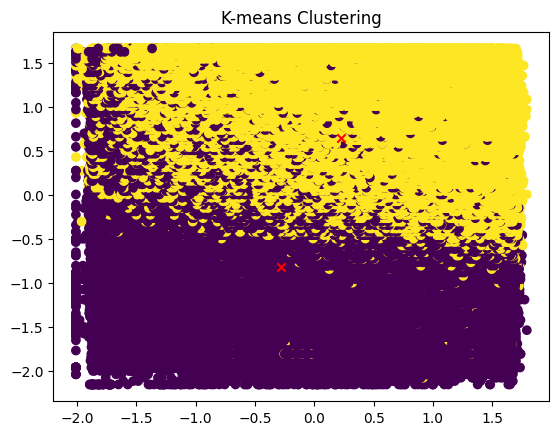

In [28]:
# Step 4: Visualize (for 2D data)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x')  # Centroids
plt.title('K-means Clustering')
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
class RANKING:
    def __init__(self, df, name_column, exclude_features = ["artists","id","name","loudness","release_date"]):
        self.df = df
        # Name of the column that contains the artist names in our case "artists"
        self.name_column = name_column
        self.exclude_features = exclude_features
        self.artist = df[name_column].tolist()
        
        # self.target_column = target_column
        
        
    def get_random_artist_observation_index_by_name(self, name):
        indexes = []
        
        # find all indexes of artists that contain the name
        for x in range(len(self.artist)):
            if name.lower() in str(self.artist[x]).lower():
                indexes.append(x)
        
        # if no matches found, return None
        if len(indexes) == 0:
            return None
        else:
            # return a random index from the found indexes 
            return  indexes[random.randint(0, len(indexes))]
        
        
    def get_cosine_similarity_matrix(self, name, n = 5):
        
        target_index = self.get_random_artist_observation_index_by_name(name)
        
        if target_index is None:
            return None
        
        if self.exclude_features is not None:
          data = self.df.drop(columns=self.exclude_features).values
        else:
            data = self.df.values
        
        normalized_data = normalize(data)
        sparse_data = csr_matrix(normalized_data)
        similarity_scores = cosine_similarity(sparse_data, dense_output=False)
        target_similarity = similarity_scores[target_index].toarray().flatten()
        target_similarity[target_index] = -1
        top_n_indices = np.argsort(target_similarity)[-n:][::-1]

        return top_n_indices

In [12]:
data= data.head(9500)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linkage_matrix = linkage(data, method='ward')  # 'ward', 'complete', 'average'

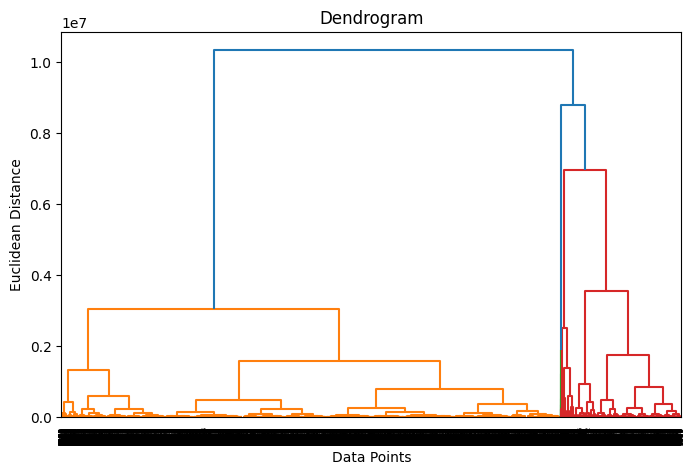

In [14]:
# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels=range(len(data)))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [2]:
RANKING = file

import / as ranking

ModuleNotFoundError: No module named 'RANKING'